# PHYS 410. Project 1
## Anuar Yeraliyev, 47382130

In [108]:
%matplotlib inline

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import mpmath as mp

## Exercise 2.16
In the first exercise we have to compute the energy levels for a single finite square well using the propagator method. First we define the matrices of $P_{allowed}$ as well as $P_{forbidden}$ for the distance between the wells for the next exercise. The $\Psi$ was propagated from point b (where $\Psi(b) = 1$) up to the end of the well. An assumption of $\Psi(b)$ yields $\Psi'(b) = \beta$.
 
$$P_{allowed} = \begin{bmatrix}
    cos(\alpha * c)       & (1/\alpha) * sin(\alpha * c)  \\
    (-\alpha) * sin(\alpha * c)       & cos(\alpha * c)  \\
    \end{bmatrix}$$
    
$$ \begin{bmatrix} 
    \Psi(c) \\
    \Psi'(c) \\
    \end{bmatrix}
    = \begin{bmatrix}
    cos(\alpha * c)       & (1/\alpha) * sin(\alpha * c)  \\
    (-\alpha) * sin(\alpha * c)       & cos(\alpha * c)  \\
    \end{bmatrix}
    \begin{bmatrix}
    \Psi(b) \\
    \Psi'(b) \\
    \end{bmatrix}
    $$
    
By rearranging $\Psi(c)$ and $\Psi'(c)$ (equating them to zero) we obtain analytic solutions:

$$ \beta * cos(\alpha * c) = \alpha * sin(\alpha * c)$$
$$ \alpha * cos(\alpha * c) = -\beta * sin(\alpha * c) $$

Since $\Psi'(b) = \beta$ because $\Psi(b) = 1$, we obtain a function of energy whose roots we need to find, $f(E) = \Psi' + \beta * \Psi = 0$.

The propagator method concludes that one can use $f(E) = \Psi' + \beta * \Psi = 0$ which we can equal to zero and subsequently find the roots (which are energy states). Newton's method has been used to estimate the roots.

All the equations are converted into matrix form and computed using symbolic computation.

In [138]:
w = 0.6
hbar2 = 0.076199682     # in units of eV*m_e*nm^2
m = 1
V0 = 10                 # eV

E = sp.Symbol('E')
w = sp.Symbol('w')
s = sp.Symbol('s')
alpha = sp.sqrt(2 * m * E / hbar2)
beta = sp.sqrt(2 * m * (V0 - E) / hbar2)
P_allowed = sp.Matrix([[sp.cos(alpha * w), ((1/alpha) * sp.sin(alpha * w))],
                       [(-alpha) * sp.sin(alpha * w), sp.cos(alpha * w)]])
P_forbidden = sp.Matrix([[sp.cosh(beta * s), (1 / beta) * sp.sinh(beta * s)],
                         [beta * sp.sinh(beta * s), sp.cosh(beta * s)]])
Psi_b = sp.Matrix([[1], [beta]])

In [134]:
def E_init_guesses(f, E0):
    arr = np.nan_to_num(np.array([f.subs(E, k).evalf() for k in E0]))
    find_even = np.abs(np.diff(np.sign(arr))) / 2
    inds = np.where(find_even == 1)[0]
    return inds

In [135]:
def newton(f, E, E_init):
    E0 = mp.linspace(0.0000001, V0-0.0000001, 10)
    iters = 1
    max_iters = 100
    accuracy = 1
    tolerance = 1e-8
    change = 1
    
    root0 = E_init
    while accuracy > tolerance and iters < max_iters:
        root1 = root0 - (f.subs(E, root0) / f.diff(E).subs(E, root0)).evalf()
        accuracy = np.abs(f.subs(E, root1).evalf())
        change = np.abs(root1 - root0)
        iters = iters + 1
        root0 = root1 
    return root1

In [140]:
[Psi, Psi_prime] = P_allowed.subs(w, 0.6) * Psi_b
E0 = mp.linspace(0.0000001, V0-0.0000001, 1000)
for i in E_init_guesses(Psi_prime + beta * Psi, E0):
    print "Root found: ", newton(Psi_prime + beta * Psi, E, E0[i]), "eV"

Root found:  0.715452497485611 eV
Root found:  2.8213918646452 eV
Root found:  6.14864413575714 eV
Root found:  9.86720374515409 eV


Both numeric and analytic solutions obtained from the propagator match the ones using the alternative previous method.

## Exercise 2.18

Using the exact functions from above we can compute the roots of a system with 2 wells where there is a separation between them.

In order to do that we need to propagate the wavefunction and its derivative further, i.e. multiply them by $P_{forbidden}$ and $P_{allowed}$ in a particular order such that $\Psi$ propagates from the point b.

$$ P_{forbidden} = \begin{bmatrix}
    cosh(\beta * s)       & (1/\beta) * sinh(\beta * s)  \\
    (-\beta) * sinh(\beta * s)       & cosh(\beta * s)  \\
    \end{bmatrix}$$
    

In [136]:
[Psi, Psi_prime] = P_allowed.subs(w, 0.6) * P_forbidden.subs(s, 0.2) * P_allowed.subs(w, 0.6) * Psi_b
E0 = mp.linspace(0.0000001, V0-0.0000001, 1000)
for i in E_init_guesses(Psi_prime + beta * Psi, E0):
    print "Root found: ", newton(Psi_prime + beta * Psi, E, E0[i]), "eV"

Root found:  0.704880345198814 eV
Root found:  0.725492335333294 eV
Root found:  2.77014630620866 eV
Root found:  2.87176000810464 eV
Root found:  6.00081761710459 eV
Root found:  6.31813039819537 eV
Root found:  9.77595591117981 eV


In [143]:
# Plotting E1 - E2 vs s
sss = mp.linspace(0.0000001, 0.6, 20)
E0 = mp.linspace(0.2, 0.9, 2000)
E1_E2 = []
E1 = []
E2 = []
for ss in sss:
    roots = []
    print "Separation = ", ss
    [Psi, Psi_prime] = P_allowed.subs(w, 0.6) * P_forbidden.subs(s, ss) * P_allowed.subs(w, 0.6) * Psi_b
    for i in E_init_guesses(Psi_prime + beta * Psi, E0):
        root = newton(Psi_prime + beta * Psi, E, E0[i])
        #print root
        roots.append(root)
    E1_E2.append(roots[0] - roots[1])
    E1.append(roots[0])
    E2.append(roots[1])
print E1_E2

Separation =  1.0e-7
Separation =  0.0315790421052632
Separation =  0.0631579842105263
Separation =  0.0947369263157895
Separation =  0.126315868421053
Separation =  0.157894810526316
Separation =  0.189473752631579
Separation =  0.221052694736842
Separation =  0.252631636842105
Separation =  0.284210578947368
Separation =  0.315789521052632
Separation =  0.347368463157895
Separation =  0.378947405263158
Separation =  0.410526347368421
Separation =  0.442105289473684
Separation =  0.473684231578947
Separation =  0.50526317368421
Separation =  0.536842115789474
Separation =  0.568421057894737
Separation =  0.6
[mpf('-0.64183230974510441'), mpf('-0.32178023332538724'), mpf('-0.18220109762064451'), mpf('-0.10823846637845003'), mpf('-0.065449958670730779'), mpf('-0.039832410892064574'), mpf('-0.024298289678335694'), mpf('-0.014834719177212241'), mpf('-0.0090597032433120672'), mpf('-0.0055334454195152816'), mpf('-0.0033798244058252935'), mpf('-0.0020644229129883618'), mpf('-0.00126097175757

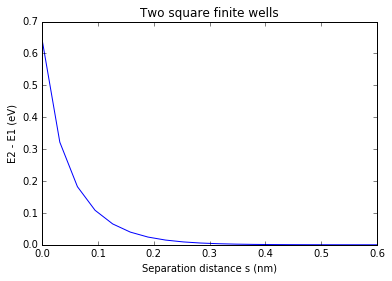

In [144]:
plt.plot(sss, np.abs(E1_E2))
plt.ylabel('E2 - E1 (eV)')
plt.xlabel('Separation distance s (nm)')
plt.title('Two square finite wells')

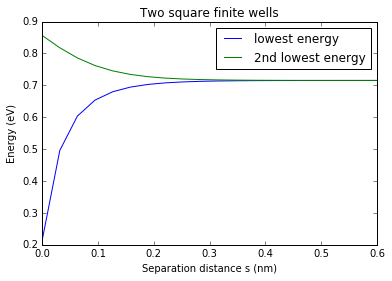

In [145]:
plt.plot(sss,E1, label='lowest energy')
plt.plot(sss, E2, label='2nd lowest energy')
plt.legend()
plt.ylabel('Energy (eV)')
plt.xlabel('Separation distance s (nm)')
plt.title('Two square finite wells')

The absolute difference between lowest two energy states decreases as $s$ increases and eventually converges to zero. This signifies that as separation distance becomes large two square wells start acting as two separate systems, i.e. the wavefunctions don't "interact".

## Exercise 2.19
In order to compute $\Psi$ for $n$ number of wells, one needs to additionally multiple $P_{allowed}$ and $P_{forbidden}$ $n$ times. After that the same method of root finding can be used.

In [149]:
n = 4
Psi = P_allowed.subs(w, 0.6) * Psi_b
for i in range(1, n):
    Psi = P_allowed.subs(w, 0.6) * P_forbidden.subs(s, 0.2) * Psi
    
[Psi, Psi_prime] = Psi
# As one computes for bigger n, we need to check for more values of E0
# because some energies might have small basin of attraction
E0 = mp.linspace(0.0000001, V0-0.0000001, 5000)
roots_n = []
for i in E_init_guesses(Psi_prime + beta * Psi, E0):
    root = newton(Psi_prime + beta * Psi, E, E0[i])
    print "Root: ", root, "eV"
    roots_n.append(root)

Root:  0.698434530914906
Root:  0.708634888794261
Root:  0.72137063123649
Root:  0.73177303646184
Root:  2.73930873401674
Root:  2.78858901377641
Root:  2.8513165063842
Root:  2.90371671149577
Root:  5.91440099869869
Root:  6.05933433756398
Root:  6.25486060740288
Root:  6.4316270889241
Root:  9.70406674765614
Root:  9.9208960519323


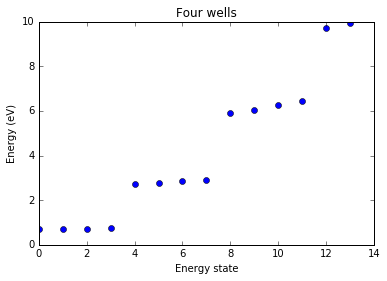

In [150]:
plt.plot(roots_n, 'o')
plt.xlabel('Energy state')
plt.ylabel('Energy (eV)')
plt.title('Four wells')

In [151]:
n = 7
Psi = P_allowed.subs(w, 0.6) * Psi_b
for i in range(1, n):
    Psi = P_allowed.subs(w, 0.6) * P_forbidden.subs(s, 0.2) * Psi
    
[Psi, Psi_prime] = Psi
# As one computes for bigger n, we need to check for more values of E0
# because some energies might have small basin of attraction
E0 = mp.linspace(0.0000001, V0-0.0000001, 5000)
roots_n = []
for i in E_init_guesses(Psi_prime + beta * Psi, E0):
    root = newton(Psi_prime + beta * Psi, E, E0[i])
    print "Root: ", root, "eV"
    roots_n.append(root)

Root:  0.696088439364343 eV
Root:  0.700450060781354 eV
Root:  0.707028889103954 eV
Root:  0.714868819913563 eV
Root:  0.722795873264153 eV
Root:  0.729584942117232 eV
Root:  0.73415667327472 eV
Root:  2.72810341723182 eV
Root:  2.7490651790024 eV
Root:  2.78090977529938 eV
Root:  2.81926190763751 eV
Root:  2.85855153582526 eV
Root:  2.89266671358631 eV
Root:  2.91590940351947 eV
Root:  5.88265607236997 eV
Root:  5.94390271483634 eV
Root:  6.03859417894608 eV
Root:  6.15591436354453 eV
Root:  6.28090954512163 eV
Root:  6.39460404135221 eV
Root:  6.47556882217206 eV
Root:  9.66852305303787 eV
Root:  9.7722915822679 eV
Root:  9.9411315305328 eV


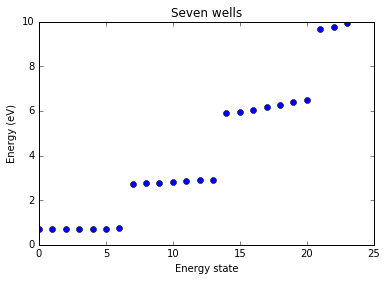

In [152]:
plt.plot(roots_n, 'o')
plt.xlabel('Energy state')
plt.ylabel('Energy (eV)')
plt.title('Seven wells')

There is an evident band structure within the energy states. The energy states are grouped by n-states in each band. For example, there are 7 states in each band in 7-well system. There are sharp and large jumps in energy between the bands.